# Tesseroid Forward Calculation with Variable Density in Depth

## One Tesseroid

We are going to try a simple forward calculation using one Tesseroid with linear variable density in depth.

**Import Packages**

In [1]:
from __future__ import division
import time
import numpy as np
from fatiando import gridder
from tesseroid_density import tesseroid
from fatiando.mesher import Tesseroid
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

**Creation of computation grid and tesseroid model**

In [2]:
# Create tesseroid model
top, bottom = 0, -35000
model = [Tesseroid(-0.5, 0.5, -0.5, 0.5, top, bottom)]

# Create the computation grid
area = (-1, 1, -1, 1)
shape = (51, 51)
lats, lons, heights = gridder.regular(area, shape, z=260000)

**Definition of density function**

In [3]:
rho0, rho1 = 2670, 3300
b = 1e5
a = (rho1 - rho0)/(np.exp((abs(top - bottom))/b) - 1)
c = rho0 - a

def density(height):
    return a*np.exp(-height/b) + c

for tess in model:
    tess.addprop('density', density)

### Fields Calculation and Plot

#### Potential

/home/santi/.anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/santi/.anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


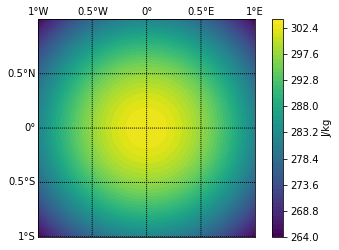

In [4]:
potential = tesseroid.potential(lons, lats, heights, model)

bm = Basemap(projection='merc',
             llcrnrlon=area[2],
             llcrnrlat=area[0],
             urcrnrlon=area[3],
             urcrnrlat=area[1],
             resolution='l')

x, y = bm(lats, lons)
bm.contourf(y.reshape(shape),
            x.reshape(shape),
            potential.reshape(shape),
            51)
bm.drawparallels(np.arange(-10, 10, 0.5), labels=[1, 0, 0, 0])
bm.drawmeridians(np.arange(-10, 10, 0.5), labels=[0, 0, 1, 0])
plt.colorbar(label="J/kg")
plt.show()

#### gz

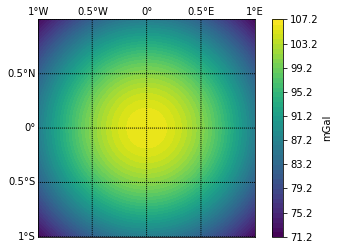

In [5]:
gz = tesseroid.gz(lons, lats, heights, model)

bm = Basemap(projection='merc',
             llcrnrlon=area[2],
             llcrnrlat=area[0],
             urcrnrlon=area[3],
             urcrnrlat=area[1],
             resolution='l')

x, y = bm(lats, lons)
bm.contourf(y.reshape(shape),
            x.reshape(shape),
            gz.reshape(shape),
            51)
bm.drawparallels(np.arange(-10, 10, 0.5), labels=[1, 0, 0, 0])
bm.drawmeridians(np.arange(-10, 10, 0.5), labels=[0, 0, 1, 0])
plt.colorbar(label="mGal")
plt.show()

#### gzz

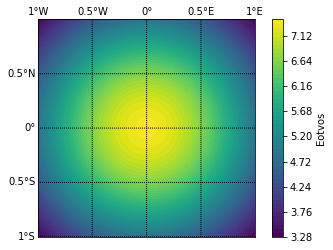

In [6]:
gzz = tesseroid.gzz(lons, lats, heights, model)

bm = Basemap(projection='merc',
             llcrnrlon=area[2],
             llcrnrlat=area[0],
             urcrnrlon=area[3],
             urcrnrlat=area[1],
             resolution='l')

x, y = bm(lats, lons)
bm.contourf(y.reshape(shape),
            x.reshape(shape),
            gzz.reshape(shape),
            51)
bm.drawparallels(np.arange(-10, 10, 0.5), labels=[1, 0, 0, 0])
bm.drawmeridians(np.arange(-10, 10, 0.5), labels=[0, 0, 1, 0])
plt.colorbar(label="Eotvos")
plt.show()

#### All fields

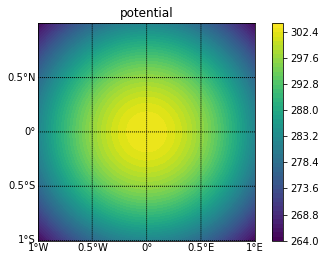

Time it took: 0.05s


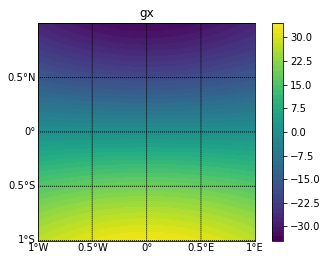

Time it took: 0.05s


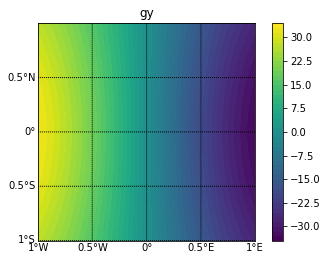

Time it took: 0.06s


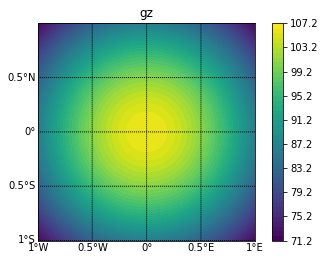

Time it took: 0.07s


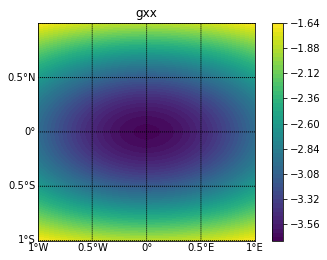

Time it took: 1.09s


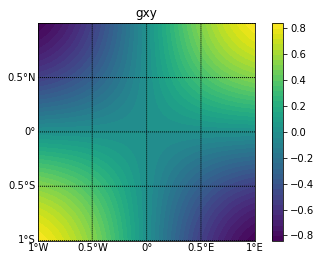

Time it took: 1.03s


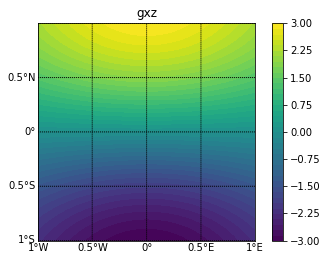

Time it took: 1.03s


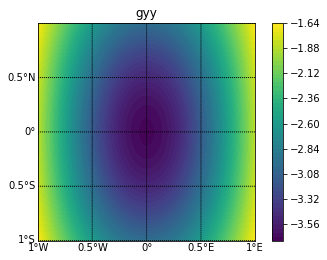

Time it took: 1.05s


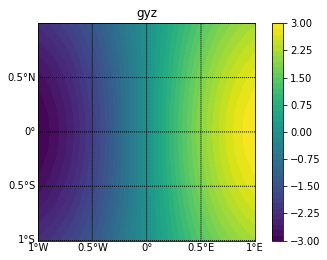

Time it took: 1.06s


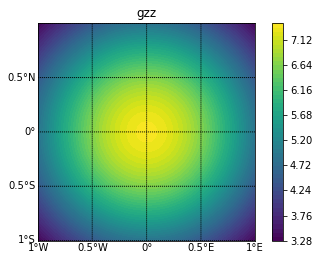

Time it took: 1.08s


In [7]:
fields = "potential gx gy gz gxx gxy gxz gyy gyz gzz".split()

bm = Basemap(projection='merc',
             llcrnrlon=area[2],
             llcrnrlat=area[0],
             urcrnrlon=area[3],
             urcrnrlat=area[1],
             resolution='l')
x, y = bm(lats, lons)

for f in fields:
    start = time.time()
    result = getattr(tesseroid, f)(lons, lats, heights, model)
    end = time.time()

    
    bm.contourf(y.reshape(shape),
                x.reshape(shape),
                result.reshape(shape),
                51)
    bm.drawparallels(np.arange(-10, 10, 0.5), labels=[1, 0, 0, 0])
    bm.drawmeridians(np.arange(-10, 10, 0.5), labels=[0, 0, 0, 1])
    plt.colorbar()
    plt.title(f)
    plt.show()
    print "Time it took: {:.2f}s".format(end - start)

## Tesseroid Mesh

Another option is to build our tesseroid model using a mesh of Tesseroids. We can set each tesseroid with variable density using a list of the functions. Moreover, we can mix constant and variable densities in the same mesh.

**Import extra class**

In [8]:
from fatiando.mesher import TesseroidMesh

**Define new density function**

In [9]:
def new_density(height):
    return -0.001*height

In [10]:
lats, lons, heights = gridder.regular(area, shape, z=10000)

**Construction of the tesseroid mesh**

In [11]:
model_shape = (1, 3, 3)
model = TesseroidMesh((-0.5, 0.5, -0.5, 0.5, top, bottom), model_shape)
density_list = [density for i in range(model.size)]
density_list[0] = 200
density_list[1] = new_density
model.addprop('density', density_list)

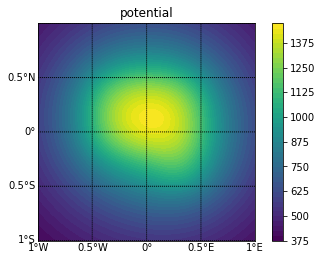

Time it took: 0.44s


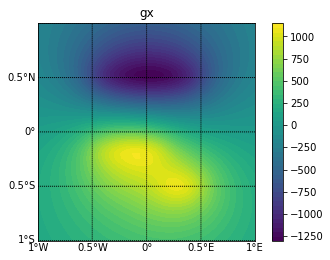

Time it took: 2.12s


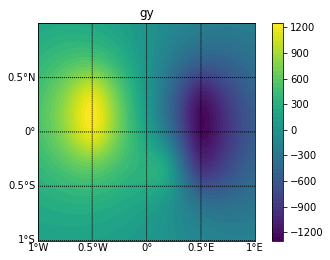

Time it took: 2.11s


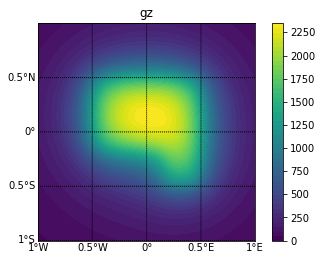

Time it took: 2.38s


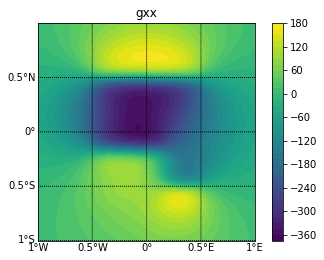

Time it took: 127.65s


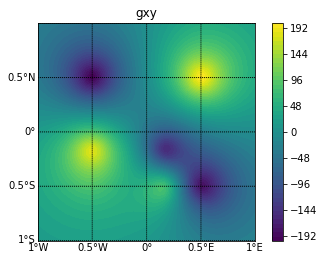

Time it took: 124.36s


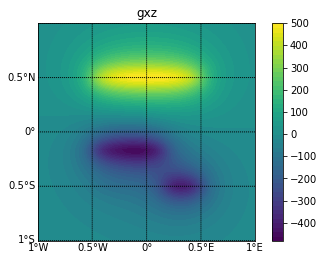

Time it took: 125.56s


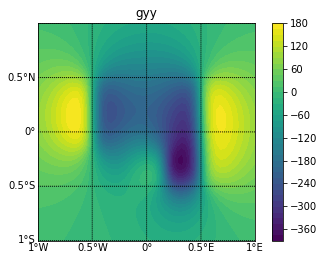

Time it took: 127.44s


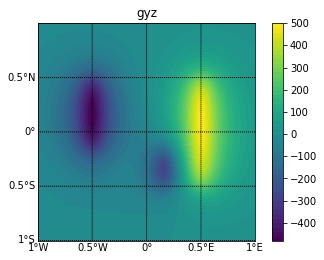

Time it took: 130.40s


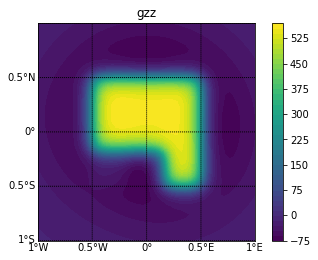

Time it took: 126.53s


In [12]:
fields = "potential gx gy gz gxx gxy gxz gyy gyz gzz".split()

bm = Basemap(projection='merc',
             llcrnrlon=area[2],
             llcrnrlat=area[0],
             urcrnrlon=area[3],
             urcrnrlat=area[1],
             resolution='l')
x, y = bm(lats, lons)

for f in fields:
    start = time.time()
    result = getattr(tesseroid, f)(lons, lats, heights, model)
    end = time.time()

    bm.contourf(y.reshape(shape),
                x.reshape(shape),
                result.reshape(shape),
                51)
    bm.drawparallels(np.arange(-10, 10, 0.5), labels=[1, 0, 0, 0])
    bm.drawmeridians(np.arange(-10, 10, 0.5), labels=[0, 0, 0, 1])
    plt.colorbar()
    plt.title(f)
    plt.show()
    print "Time it took: {:.2f}s".format(end - start)